# 6.1 迴歸就是函數學習

*一、將想解決的問題化成函數(數學建模)*
*二、利用歷史資料找出函數(迴歸、機器學習、神經網絡)*
*三、評估函數是否符合需求*

# 6.2 線性迴歸概念
scikit-learn套件

# 6.3 模擬線性迴歸資料

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
x= np.linspace(0, 5, 50)

In [4]:
y=1.2*x+0.8

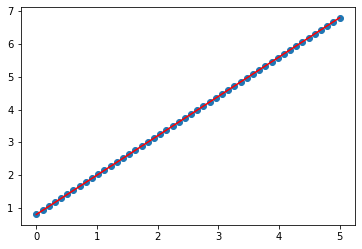

In [6]:
plt.scatter(x,y)
plt.plot(x,y,'r')

模擬真實世界加入noise/誤差項

In [7]:
y=1.2*x+0.8+0.6*np.random.randn(50)

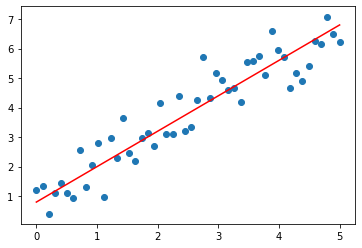

In [9]:
plt.scatter(x,y)
plt.plot(x,1.2*x+0.8,'r')

# 6.4 假的資料真的迴歸
scikit-learn常適用於機器學習
於此為了避免介紹過多套件，便也用來做迴歸

In [10]:
from sklearn.linear_model import LinearRegression

事先開啟迴歸機器

In [11]:
regr = LinearRegression()

In [12]:
X = x.reshape(50,1)

In [13]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
Y= regr.predict(X)

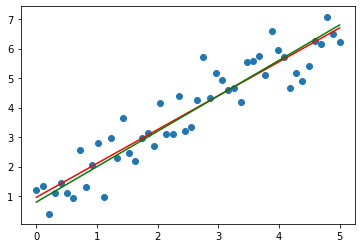

In [16]:
plt.scatter(x,y)
plt.plot(X,Y, 'r')
plt.plot(X,1.2*x+0.8, 'g')

# 6.5 過度擬合overfitting 

In [17]:
from ipywidgets import interact

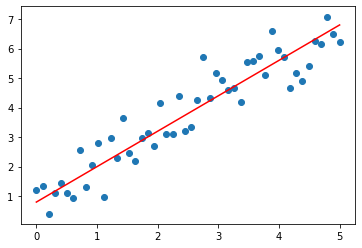

In [18]:
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

In [23]:
X =np.linspace(0,5,1000)
def my_fit(n):
    Y= 4 * np.sin(n*X) + 4
    plt.scatter(x,y)
    plt.plot(X,Y,'r')
    plt.show()

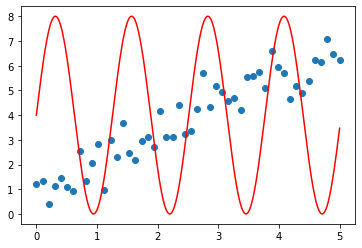

In [24]:
my_fit(5)

In [25]:
interact(my_fit,n=(1,500))

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), Output()), _dom_classes=('widget-…

<function __main__.my_fit(n)>

# 6.6 訓練資料和測試資料
回顧：換句話說，過度擬合發生於訓練資料過於良好，但卻在真實事件中預測能力差。

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
x = np.linspace(0,5,100)
y = 1.2*x+0.8+0.5*np.random.randn(100)

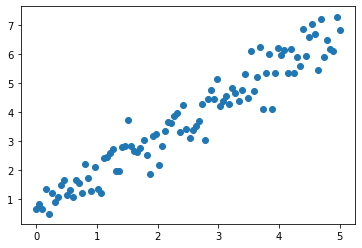

In [6]:
plt.scatter(x,y)

分隔訓練資料與測試資料
- sklearn.model_selection 的 train_test_split

In [7]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=87)

取20%的測試資料，並設定亂數seeds

In [10]:
x_train = x_train.reshape(80,1)
x_test.shape=(20,1)

兩種調整矩陣的方式

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regr = LinearRegression()

In [13]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 資料訓練結果

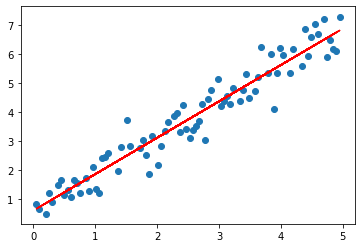

In [14]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.predict(x_train), "r")

### 測試訓練結果準確與否

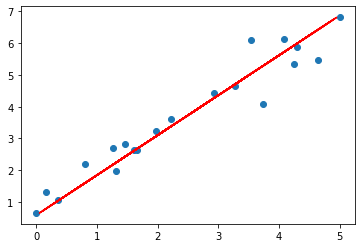

In [16]:
plt.scatter(x_test, y_test)
plt.plot(x_train, regr.predict(x_train), "r")

# 6.7 預測波士頓房價

In [25]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

讀入可以測試的資料庫 (被稱為"Toy Datasets)

In [27]:
from sklearn.datasets import load_boston

In [28]:
boston = load_boston()

In [29]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [30]:
X=boston.data
Y=boston.target

In [31]:
len(X)

506

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=87)

In [36]:
regr = LinearRegression()

In [37]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_predict= regr.predict(x_test)

Text(0, 0.5, 'Predited Price')

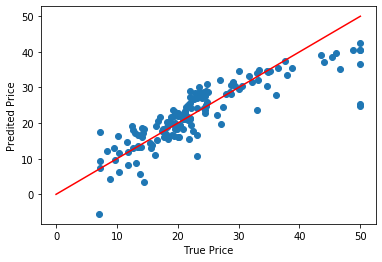

In [40]:
plt.scatter(y_test, y_predict)
plt.plot([0,50],[0,50],'r')
plt.xlabel("True Price")
plt.ylabel("Predited Price")

- 資料庫內容的詳細資料

In [41]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 6.8 畫出各個feature和輸出的關係

同樣以波士頓房價為範例。

### [小技巧]善用enumerate

In [43]:
L = ["a","b","c"]

In [44]:
for i in L:
    print(i)

a
b
c


In [46]:
for i in range(3):
    print(i+1, L[i])

1 a
2 b
3 c


In [47]:
for i in enumerate(L):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


enumerate可以將list的index和item包成一個tuple，再把每個tuple包成按index順序的tuple

In [48]:
for i, s in enumerate(L):
    print(i+1,s)

1 a
2 b
3 c


### [小技巧]畫多個圖

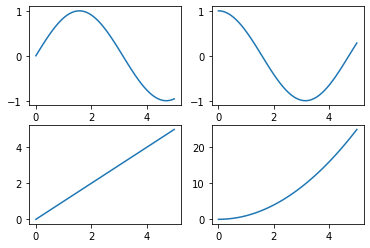

In [50]:
plt.subplot(2,2,1)
plt.plot(x, np.sin(x))

plt.subplot(2,2,2)
plt.plot(x, np.cos(x))

plt.subplot(2,2,3)
plt.plot(x, x)

plt.subplot(2,2,4)
plt.plot(x, x**2)

### 畫出個別參數與target的關係

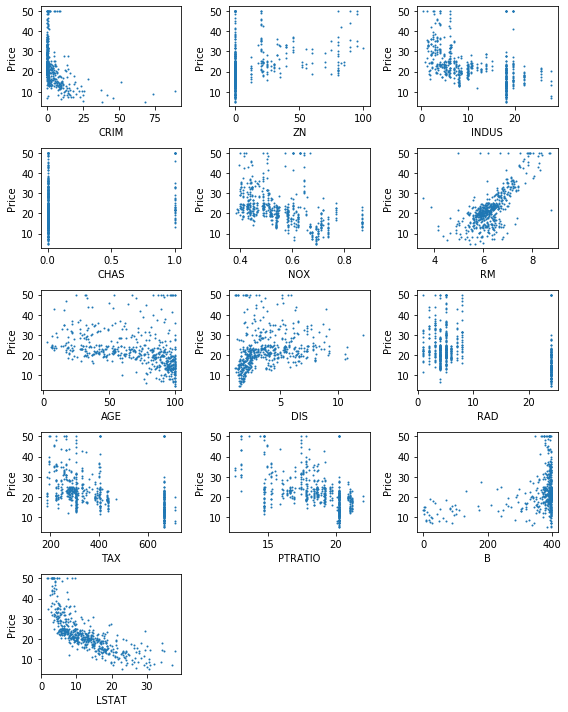

In [57]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5,3, i+1)
    plt.scatter(X[:,i],Y, s=1)
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.tight_layout()